<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Renatta Garcia Sanchez, Juan Enrique Aguirre López

**Fecha:**  22 de octubre del 2020.

**Expediente** : 703275 ,722664 
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Liga repositorio:** https://github.com/renattaGS/Tareas_simproc_aguirre_garcia

# Tarea 7: Clase 14

## Ejercicio 1

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
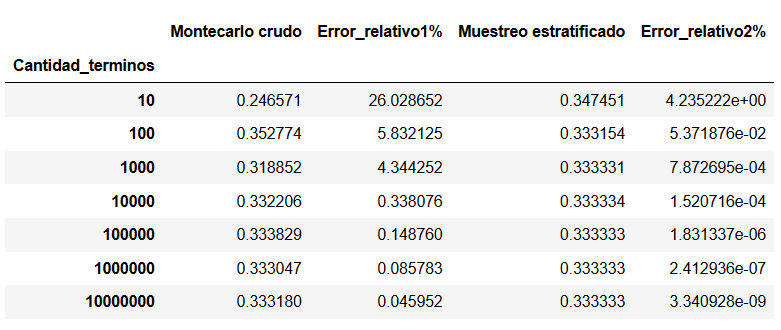

## Solución Juan Enrique

In [1]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

In [2]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [3]:
# Aproximar integrales con Montecarlo estratificado
def Montecarlo_est(B: 'Número de estratos'):
    '''Esta es una función general para aproximar integrales de acuerdo con un numero específico de estratos que se definan'''
    u = np.random.uniform(a,b,B) #primero generamos las v.a. que seran evaluadas en la funcion que queramos integrar
    i = np.arange(0,B) #indica los términos, desde 0 hasta los 'B' estratos que se elijan
    v = (u+i)/B #aplicar estratificación
    return v

In [4]:
I = 1/3
# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int)

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Valor_montecarlo_crudo', 'Error_relativo_crudo%', 
                                   'Valor_montecarlo_estr', 'Error_relativo_estr%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))
u_estr = list(map(Montecarlo_est, N)) #hacer el estratificado

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y: int_montecarlo(lambda x:x**2,a,b,Y), ui))
#Aproximacion con los u_estr generados
I_estr = list(map(lambda Y: int_montecarlo(lambda x:x**2,a,b,Y), u_estr))

# Mostramos los resultados en la tabla previamente creada
df.loc[N,'Valor_montecarlo_crudo'] = I_m
df.loc[N,'Error_relativo_crudo%'] = np.abs(df.loc[N, 'Valor_montecarlo_crudo']-I)*100/I

df.loc[N, 'Valor_montecarlo_estr'] = I_estr
df.loc[N, 'Error_relativo_estr%'] = np.abs(df.loc[N, 'Valor_montecarlo_estr']-I)*100/I

df

,Valor_montecarlo_crudo,Error_relativo_crudo%,Valor_montecarlo_estr,Error_relativo_estr%
Cantidad_terminos,,,,
10,0.364004,9.201251,0.321011,3.696697e+00
100,0.271613,18.516202,0.333181,4.579079e-02
1000,0.326401,2.079576,0.333323,3.085668e-03
10000,0.332812,0.156447,0.333333,4.098249e-05
100000,0.333519,0.055621,0.333333,1.968282e-06
1000000,0.333564,0.069324,0.333333,5.307573e-08
10000000,0.333396,0.018777,0.333333,1.314399e-09


## Solución Renatta 

In [5]:
import pandas as pd
import numpy as np

def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

def muestreo_est(B: 'Número de estratos'):
    '''Esta función realiza el método de muestro estratíficado para un número de estratos dados'''
    np.random.seed(95555)
    u= np.random.uniform(a,b,B) #generar B valores aleatorios con distribución uniforme
    i=np.arange(0,B) 
    v = (u+i)/B #aplicar estratificación
    return v

In [6]:
I = 1/3 #resultado analítico de la integral
# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int)

# data frame
df = pd.DataFrame(index=N,columns=['Montecarlo crudo', 'Error_relativo%', 
                                   'Muestreo estratificado', 'Error_relativo2%' ], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))
ue= list(map(muestreo_est, N)) #estratificar los valores

#aplicar método montecarlo con los ui generados
I_m= [int_montecarlo(lambda x:x**2, a, b, Y) for Y in ui]
#aplicar método montecarlo con varialbes estratificiadas 
I_e= [int_montecarlo(lambda x:x**2, a, b, Y) for Y in ue]



df.loc[N,"Montecarlo crudo"] = I_m
df.loc[N,"Error_relativo%"] = np.abs(df.loc[N,"Montecarlo crudo"]-I)*100/I

df.loc[N,"Muestreo estratificado"] = I_e
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,"Muestreo estratificado"]-I)*100/I

df


,Montecarlo crudo,Error_relativo%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.443372,33.011639,0.348300,4.490127e+00
100,0.359903,7.970757,0.333290,1.293137e-02
1000,0.340677,2.203144,0.333334,2.356385e-04
10000,0.329682,1.095546,0.333333,1.017211e-05
100000,0.334870,0.461052,0.333333,1.408574e-06
1000000,0.333389,0.016732,0.333333,1.318425e-07
10000000,0.333341,0.002348,0.333333,5.348905e-09


## Ejercicio 2

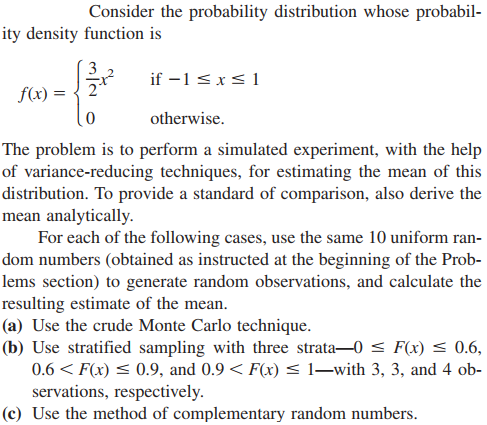
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

## Solución Juan Enrique

## Primero los pasos para hallar la inversa y F(x)

$$f(x) = \frac{3}{2}x^2  $$

Integramos del limite inferior(-1) hasta x

$$F(x)= \int _{-1} ^x \frac{3}{2} x^2 dx= (\frac{1}{2}x^3)|_{-1} ^x = \frac{1}{2} x^3 + \frac{1}{2}$$

$F(x) = \frac{1}{2}x^3 + \frac{1}{2} ....-> U = \frac{1}{2}x^3 + \frac{1}{2} ....-> \sqrt[3] {2U-1} = x$ --> Funcion inversa con la que generaremos las v.a.

Ahora debemos de caluclar la integral analíticamente para saber cual es el valor al que tenemos que llegar

$$E(f(x))=\int_{-1}^{1} x f(x) dx = \frac{3}{2}x^2 * x  = \int_{-1}^{1} \frac{3}{2}x^3 dx = \frac{3}{8} (x^4)|_{-1}^1 =0$$

Para el inciso b), necesitare sacar los pesos, que basicamente serían de la siguiente manera:

$$w_1 = \frac{3/10}{0.6} = 1/2$$
$$w_2 = \frac{3/10}{0.3} = 1$$
$$w_3 = \frac{4/10}{0.1} = 4$$

In [7]:
N = 10
#N = np.logspace(1,7,7,dtype=int)

# Función inversa
f_inv=lambda u: np.cbrt(2*u-1)

I = 0
# intervalo de integración
a = -1; b = 1

# MÉTODOS PARA APROXIMAR LA MEDIA DE LA DISTRIBUCIÓN 
# 1. Montecarlo crudo
# Números aleatorios dependiente de la cantidad de términos N
ui2 = np.random.uniform(a,b,N)

I_m2 = f_inv(ui2)
sol1 = I_m2.mean()

print('Media con montecarlo crudo = ', sol1)

# 2. Método estratificado 
r1 = np.random.uniform(0,0.6, 3)
r2 = np.random.uniform(0.6,0.9, 3)
r3 = np.random.uniform(0.9,1, 4)
r  = [r1,r2,r3]

w  = [1/2,1,4] #pesos

xi = list(map(f_inv, r)) #evaluar r en la función para obtener xi
u_est2 = list(map(lambda wi,xi: xi/wi, w,xi))

sol2 = np.concatenate(u_est2).mean()

print('Media con montecarlo estratificado = ', sol2)

# 3. Método números complementarios
# Generación de Números aleatorios
ri1 = np.random.uniform(a,b,N)
xi11 = np.cbrt(2*ri1-1)
# Media de observaciones aleatorias
m_rand = np.mean(xi11)
#print('Media de observaciones aleatorias      = ', m_rand)

# Números aleatorios complementarios
ri_c = 1-ri1
xi_c = np.cbrt(2*ri_c-1)
# Media de observaciones complementarias
m_comple = np.mean(xi_c)
#print('Media de observaciones complementarias = ', m_comple)

m_estimada = (m_rand+m_comple)/2
print('La media estimada con el M.N.C es      = ',m_estimada)

Media con montecarlo crudo =  -0.7594543132440642
Media con montecarlo estratificado =  -0.09118466131337481
La media estimada con el M.N.C es      =  0.0


Ahora, con el mismo método de estratificación, pero tomando 2,4,6 y 10 estratos respectivamente

In [9]:
#Con 2 estratos
r1 = np.random.uniform(0,0.5,5)
r2 = np.random.uniform(0.5,1,5)
r  = [r1,r2]
m  = range(len(r))  # Cantidad de estratos
w  = [1,1]
xi = list(map(f_inv,r))
muestras = list(map(lambda wi,xi:xi/wi,w,xi))
muestras2=np.concatenate(muestras)
muest_estrat2=muestras2.mean()
print("La media con 2 estratos es ", muest_estrat2)

La media con 2 estratos es  0.005584951728378784


In [10]:
#4estratos
r1 = np.random.uniform(0,0.25,2)
r2 = np.random.uniform(0.25,0.5,2)
r3 = np.random.uniform(0.5,0.75,3)
r4 = np.random.uniform(0.75,1,3)
r  = [r1,r2, r3, r4]
m  = range(len(r))  # Cantidad de estratos
w  = [0.8,0.8, 1.2, 1.2]
xi = list(map(f_inv,r))
muestras = list(map(lambda wi,xi:xi/wi,w,xi))
muestras4=np.concatenate(muestras)
muest_estrat4=muestras4.mean()
print("La media con 4 estratos es ", muest_estrat4)

La media con 4 estratos es  0.028536183481265142


In [11]:
#6 estratos
r1 = np.random.uniform(0,1/6,2)
r2 = np.random.uniform(1/6,1/3,2)
r3 = np.random.uniform(1/3,1/2,2)
r4 = np.random.uniform(1/2,2/3,2)
r5 = np.random.uniform(2/3,5/6,1)
r6 = np.random.uniform(5/6,1,1)
r  = [r1,r2, r3, r4, r5, r6]
m  = range(len(r))  # Cantidad de estratos
w  = [1.2, 1.2, 1.2, 1.2, 0.6, 0.6]
xi = list(map(f_inv,r))
muestras = list(map(lambda wi,xi:xi/wi,w,xi))
muestras6=np.concatenate(muestras)
muest_estrat6=muestras6.mean()
print("La media con 6 estratos es ", muest_estrat6)

La media con 6 estratos es  0.0009439655616730214


In [13]:
#10 estratos
a=-1
b=1
u_est=muestreo_est(10)
estratos10=f_inv(u_est).mean()
print("La media con 10 estratos es ", estratos10)

La media con 10 estratos es  -0.09814781524289191


## Solución Renatta 

## Solución análitica. 

El primer paso es encontrar la función de probabilidad acumulada, para encontrar la inversa y así generar variables aleatorias que distribuyan como f(x)

Para encontrar la acumlada integramos de -1 a x de la siguiente forma 

$$
F(x)= \int _{-1} ^x \frac{3}{2} x^2 dx= (\frac{3}{2})(\frac{x^3}{3})|_{-1} ^x = \frac{1}{2} x^3 + \frac{1}{2}
$$

Una vez encontrada la función de probabilidad acumulada, igualamos a U para encontrar la inversa. 

$$
U=\frac{1}{2} x^3 + \frac{1}{2}
$$

$$
\sqrt[3]{2u-1}=x
$$

Con esta función vamos a generar los valores que distribuyen como f(x). 

Además el problema pide calcular la media de forma analítica:

$$
E[f(x)]=\int_{-1}^{1} x f(x) dx = \frac{3}{2} \int_{-1}^{1} x^3 dx = \frac{3}{8} (x^4)|_{-1}^1 =0
$$

Esto nos servirá de referencia para aproximar con los métodos. 

## Monte carlo crudo

In [14]:
import numpy as np 

np.random.seed(95555) #semilla para que no cambien los valores

F_inv=lambda u: np.cbrt(2*u-1) #función inversa 

N=10 #cantidad de valores generados

u=np.random.uniform(0,1,N) #variables aleatorias uniformes.

mont_crudo=F_inv(u).mean() #evaluamos los valores en la invers y calculamos la media
print("La media con montecarlo crudo es ", mont_crudo)

La media con montecarlo crudo es  0.3676984728978388


## Muestreo estratificado

En este caso como los esrtratos no son ingualmente ponderados tenemos que calcular los pesos que corresponde a cada uno, estos se muestran en la siguiente tabla. 

\begin{array}{|c|c|}
\hline
    Estrato & Porción & Estrato & Tamaño & Peso \\\\ \hline
    1 & 0 \leq F(x) \leq 0.6 & 0+0.6r & 3 & 0.5 \\\\ \hline
    2 & 0.6 < F(x) \leq 0.9 & 0.6+0.3r & 3 & 1 \\\\ \hline
    3 & 0.9 < F(x) \leq 1 & 0.9+0.1r & 4 & 4 \\\\ \hline
\end{array}

In [15]:
np.random.seed(95555)
r1 = np.random.uniform(0,0.6,3)
r2 = np.random.uniform(0.6,0.9,3)
r3 = np.random.uniform(0.9,1,4)
r  = [r1,r2,r3] #vector con los valores de cada estrato 
m  = range(len(r)) #cantidad de estratos 
w  = [1/2,1,4] #pesos
xi = list(map(F_inv,r)) #evaluar r en la función para obtener xi
muestras = list(map(lambda wi,xi:xi/wi,w,xi)) #hacer divición de pesos
muestras=np.concatenate(muestras) #extender las listas 
muest_estrat=muestras.mean() #caluclar las medias
print("La media con 3 estratos es ", muest_estrat)

La media con 3 estratos es  0.12860678678497178


## Números complementarios

In [16]:
u_c=-u #calcular los complementarios del primer vector 
complementario=F_inv(u_c).mean() #evaluar los complementarios en la función y calculamos la media
complementarios=(mont_crudo+complementario)/2 #aplicamos el promedio de las medias
print("La media con el método de números complementarios es ", complementarios)

La media con el método de números complementarios es  -0.47162846308717654


## Distintos estratos

In [17]:
def Montecarlo_est_dist(B: 'Número de estratos'):
    '''Esta para generar números estratificados en un rango de 0 a 1 según el número de estratos que se indiquen'''
    u = np.random.uniform(0,1,B) #primero generamos las v.a. que seran evaluadas en la funcion que queramos integrar
    i = np.arange(0,B) #indica los términos, desde 0 hasta los 'B' estratos que se elijan
    v = (u+i)/B #aplicar estratificación
    return v

muest_estrat2=Montecarlo_est_dist(2)
muest_estrat2=F_inv(muestras2).mean()
print("La media con 2 estratos es ", muest_estrat2)

La media con 2 estratos es  -0.27191764587274236


In [18]:
muestras4=Montecarlo_est_dist(4)
muest_estrat4=F_inv(muestras4).mean()
print("La media con 4 estratos es ", muest_estrat4)

La media con 4 estratos es  0.008592462153906438


In [19]:
muestras6=Montecarlo_est_dist(6)
muest_estrat6=F_inv(muestras6).mean()
print("La media con 6 estratos es ", muest_estrat6)

La media con 6 estratos es  0.03808604011131189


Para 10 estratos como es igual al número de datos ya no realizamos las ponderaciones

In [20]:
muestras10=Montecarlo_est_dist(10)
estratos10=F_inv(muestras10).mean()
print("La media con 10 estratos es ", estratos10)

La media con 10 estratos es  -0.00037310116022758465


## Conclusiones

Es fácil observar que conforme aumentamos los estratos la media se va a acercando mucho más a la media real, en este caso es difícil estimar correctamente porque estamos trabajando con muy pocos pero la diferencia con los otros métodos sí es considerable.